In [1]:
#ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.

'''
A value of 0 can be used for a parameter, which indicates to not use that element of the model. 
This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0)
'''


'\nA value of 0 can be used for a parameter, which indicates to not use that element of the model. \nThis way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.\n\nWe can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0)\n'

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

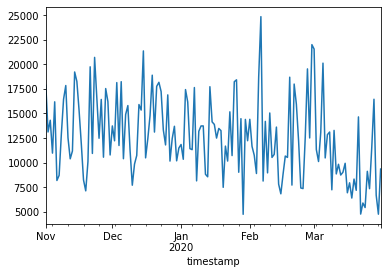

In [4]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
#series = pd.read_csv('./Input/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = pd.read_csv('p01_steps.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#print(series.head())
series.plot()
pyplot.show()

In [5]:
#X = series.values
#X = log(X)
dftest = adfuller(series, autolag = 'AIC', regression='ct')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -10.91052883494531
2. P-Value :  3.299803284139003e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 151
5. Critical Values :
	 1% :  -4.020010057177695
	 5% :  -3.4399749739075576
	 10% :  -3.144351820618417


In [6]:
dftest = adfuller(series, autolag = 'AIC', regression='c')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.541593001549105
2. P-Value :  0.10567940848436724
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 145
5. Critical Values :
	 1% :  -3.476273058920005
	 5% :  -2.881687616548444
	 10% :  -2.5775132580261593


In [7]:
dftest = adfuller(series, autolag = 'AIC', regression='ctt')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -11.293114449143905
2. P-Value :  5.389693624726447e-18
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 151
5. Critical Values :
	 1% :  -4.449541009683263
	 5% :  -3.872082734430435
	 10% :  -3.577746361147748


In [8]:
#https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(series, model='multiplicative')
#result.plot()
#pyplot.show()

In [9]:
#result = seasonal_decompose(series, model='additive')
#result.plot()
#pyplot.show()

In [10]:
#seasonality=result.seasonal
#seasonality.plot(color='green')

In [11]:
#https://towardsdatascience.com/how-to-remove-non-stationarity-in-time-series-forecasting-563c05c4bfc7
#remove non-stationarity

def shiftLbyn(arr, n=0):
    return arr[n::] + arr[:n:]

def shiftRbyn(arr, n=0):
    return arr[n:len(arr):] + arr[0:n:]
#print(test_data['Open'].values.tolist())

#print(test_data['Open'].corr(test_data['Open'],method='pearson'))

test_lag1=shiftLbyn(series.values.tolist(), 1)
test_lag2=shiftLbyn(series.values.tolist(), 2)
test_lag3=shiftLbyn(series.values.tolist(), 3)
test_lag4=shiftLbyn(series.values.tolist(), 4)
test_lag5=shiftLbyn(series.values.tolist(), 5)
test_lag6=shiftLbyn(series.values.tolist(), 6)

df=pd.DataFrame()
df['data']=series.values.tolist()
df['test_lag1']=test_lag1
df['test_lag2']=test_lag2
df['test_lag3']=test_lag3
df['test_lag4']=test_lag4
df['test_lag5']=test_lag5
df['test_lag6']=test_lag6

print("Lag 1 correlation: "+str(df['data'].corr(df['test_lag1'])))
print("Lag 2 correlation: "+str(df['data'].corr(df['test_lag2'])))
print("Lag 3 correlation: "+str(df['data'].corr(df['test_lag3'])))

Lag 1 correlation: 0.18381813921312284
Lag 2 correlation: 0.12970811086745707
Lag 3 correlation: 0.013820052326570123


In [12]:
#print (df.head)

In [13]:
dftest = adfuller(df['test_lag6'].dropna())

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -6.964211626159856
2. P-Value :  9.001779536791284e-10
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 150
5. Critical Values :
	 1% :  -3.474714913481481
	 5% :  -2.881008708148148
	 10% :  -2.5771508444444446


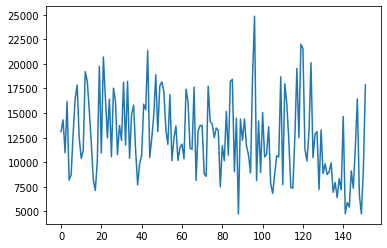

In [14]:
df['test_lag1'].plot()
pyplot.show()

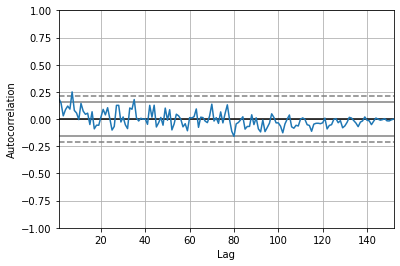

In [15]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

#we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.
#A good starting point for the AR parameter of the model may be 5.

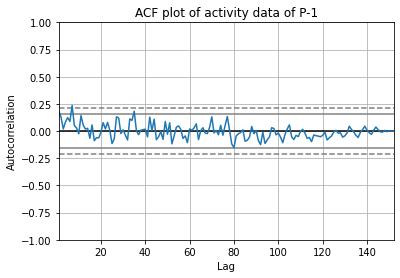

In [16]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['test_lag3'])
pyplot.title('ACF plot of activity data of P-1')
pyplot.show()

In [17]:
'''
#non-stationairy to stationary

dataframe = pd.DataFrame(series)

rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = pyplot.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = pyplot.subplot()
data.plot(title='original');
'''

"\n#non-stationairy to stationary\n\ndataframe = pd.DataFrame(series)\n\nrolling_mean = data.rolling(window = 12).mean()\ndata['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()\nax1 = pyplot.subplot()\ndata['rolling_mean_diff'].plot(title='after rolling mean & differencing');\nax2 = pyplot.subplot()\ndata.plot(title='original');\n"

In [18]:
#ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, 
#and uses a moving average model of 0

from statsmodels.tsa.arima.model import ARIMA
order = (10, 2, 4)
# fit model
model = ARIMA(df['test_lag3'], order=order)
model_fit = model.fit()

In [19]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              test_lag3   No. Observations:                  152
Model:                ARIMA(10, 2, 4)   Log Likelihood               -1464.128
Date:                Mon, 15 Nov 2021   AIC                           2958.256
Time:                        03:07:01   BIC                           3003.416
Sample:                             0   HQIC                          2976.603
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2944      0.396     -3.273      0.001      -2.070      -0.519
ar.L2         -1.6307      0.222     -7.337      0.000      -2.066      -1.195
ar.L3         -2.2467      0.574     -3.917      0.0

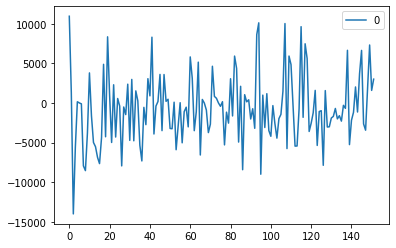

In [20]:
# line plot of residuals
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

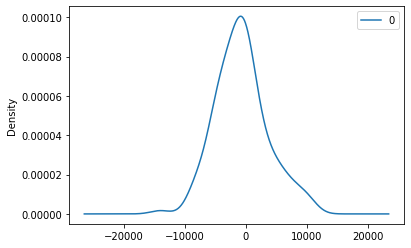

In [21]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [22]:
# summary stats of residuals
print(residuals.describe())

                  0
count    152.000000
mean    -699.702609
std     4295.655874
min   -14019.444968
25%    -3485.673442
50%     -816.424827
75%     1513.063596
max    10970.000000


In [23]:
series.index = series.index.to_period('M')

In [24]:
import time

start = time.time()

# split into train and test sets
X = df['test_lag3'].values.astype('float32')
#size = int(len(X) * 0.8)
size = 145
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

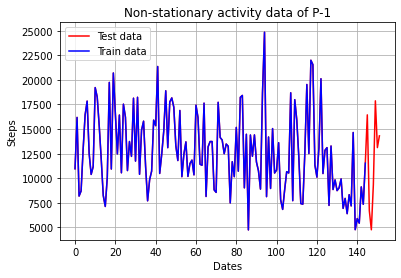

In [25]:
pyplot.grid(True)
pyplot.xlabel('Dates')
pyplot.ylabel('Steps')
pyplot.plot(X, 'red', label='Test data')
pyplot.plot(train, 'blue', label='Train data')
pyplot.legend()
pyplot.title('Non-stationary activity data of P-1')
pyplot.show()

In [26]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=order)
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
end = time.time()

predicted=9465.821496, expected=16448.000000
predicted=9485.257984, expected=6698.000000
predicted=8964.344318, expected=4761.000000
predicted=6825.374516, expected=9351.000000
predicted=10273.290176, expected=17873.000000
predicted=11277.682140, expected=13118.000000
predicted=11047.920122, expected=14312.000000


Test MSE: 21766155.423
Test RMSE: 4665.421
Test MAE: 4171.788
Time elapsed:7.599409103393555 s


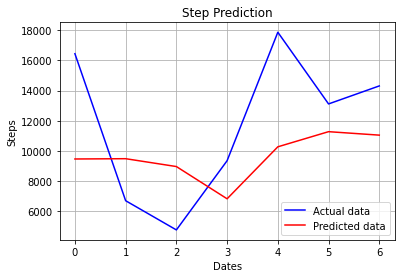

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
elapsed = end - start
print("Time elapsed:" +str(elapsed)+" s")
# plot forecasts against actual outcomes

pyplot.grid(True)
pyplot.xlabel('Dates')
pyplot.ylabel('Steps')
pyplot.plot(test, color='blue', label='Actual data')
pyplot.plot(predictions, color='red', label='Predicted data')
pyplot.legend()
pyplot.title('Step Prediction')
pyplot.show()

In [28]:
#https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/


In [29]:
# load model
#loaded = ARIMAResults.load('model_arima.pkl')